[0.0013171225937183384, 0.0016260162601626014, 0.0019367991845056064, 0.002249488752556237, 0.0025641025641025637, 0.0028806584362139915, 0.0031991744066047468, 0.0035196687370600407, 0.0038421599169262714]
[0.8932713855916419, 0.871401876386026, 0.8504994086815885, 0.8305328348654125]


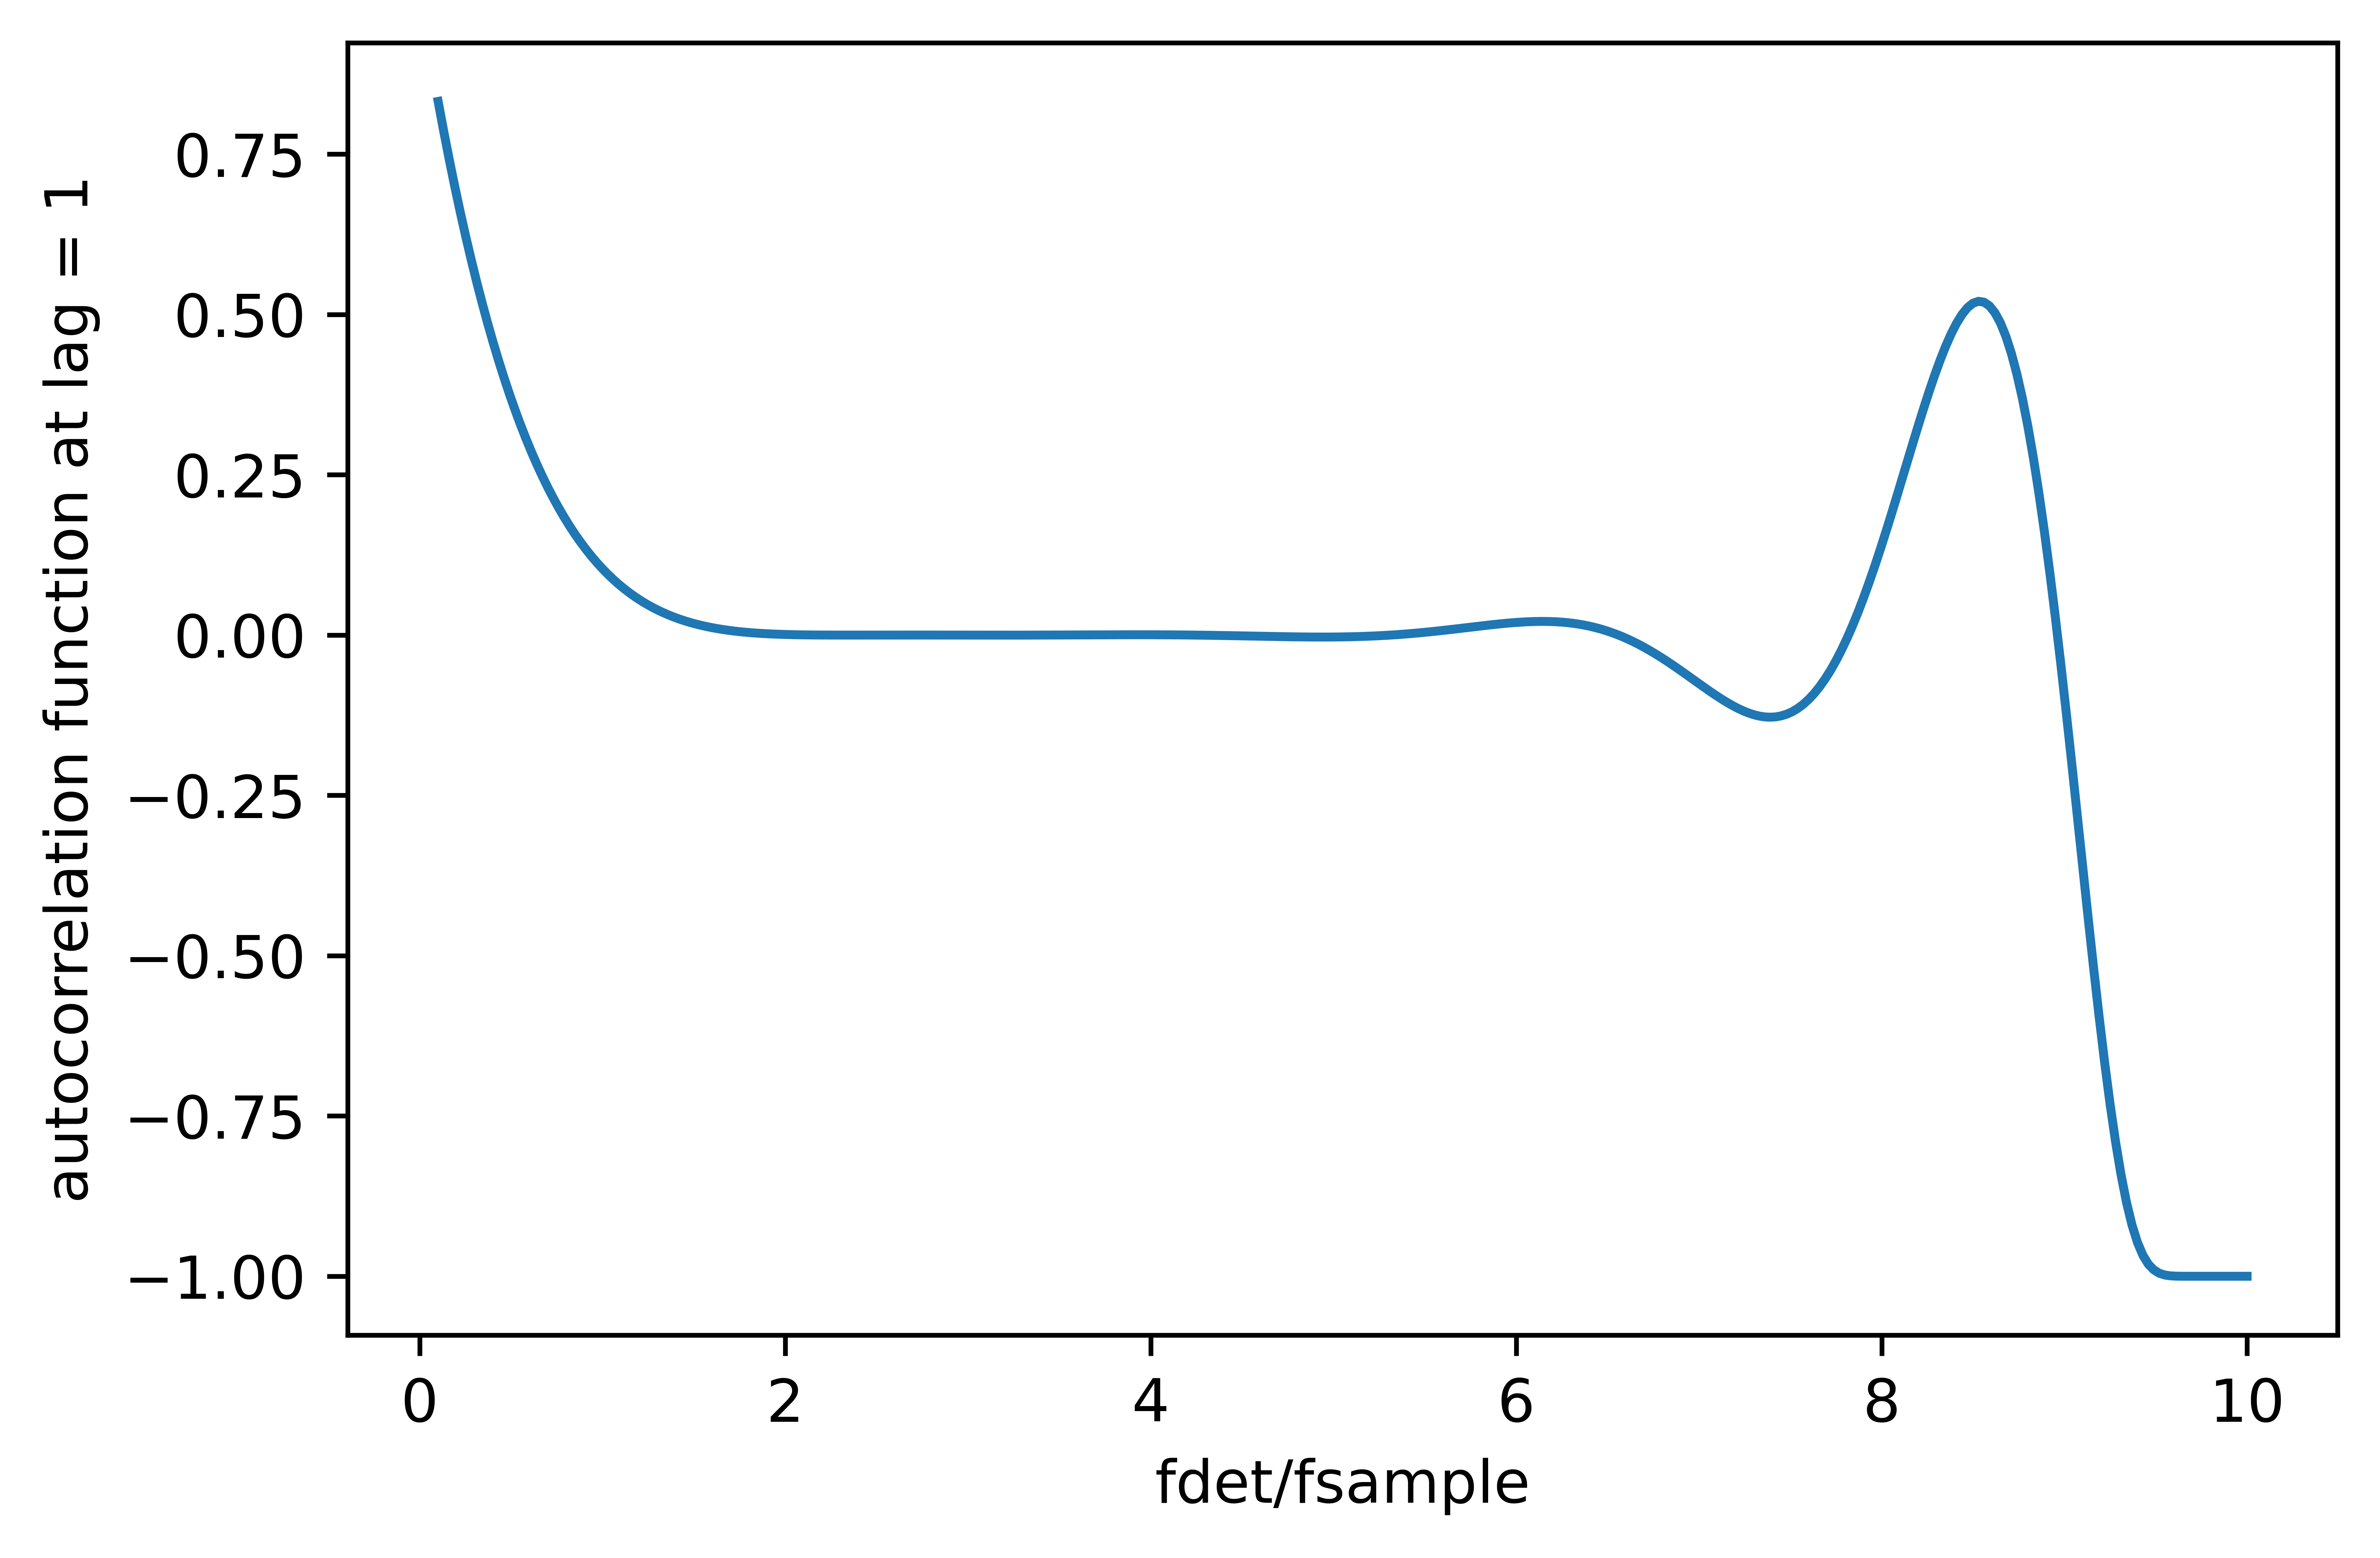

<Figure size 432x288 with 0 Axes>

In [63]:
import numpy as np
from scipy.stats import poisson, erlang
import math
import matplotlib.pyplot as plt

def range1(end):
    return range(np.int(end+1))

def s1_calc(t, c, la):
    suma = 0.0;
    for n in range1(np.floor(t/2/c)):
        #for k in range1(2*n-1):
        #suma = suma - poisson.cdf(2*n-1, la*(t-2*n*c), loc=0)
        val=erlang.cdf(t-2*n*c, 2*n, loc=0, scale=1/la)
        #print(t-2*n*c, " == ", val)
        if math.isnan(val)==0:
            suma = suma + val
        else:
            suma = suma + 1
    for n in range1(np.floor(t/2/c-0.5)):
        #for k in range1(2*n):
        #suma = suma + poisson.cdf(2*n, la*(t-2*(n+1)*c), loc=0)
        val=erlang.cdf(t-(2*n+1)*c, 2*n+1, loc=0, scale=1/la)
        #suma = suma - erlang.cdf(t-(2*n+1)*c, 2*n+1, loc=0, scale=1/la)
        if math.isnan(val)==0:
            suma = suma - val
        else:
            suma = suma - 1
    return suma

tz = 100
fsample = 1/tz
c = 10
fdet = [n for n in np.arange(0.001, 0.1, 3e-4)] #jer fdet * c <= 1
lam = [x / (1-c*x) for x in fdet]
print(lam[1:10])

#print(1.0/np.array(fdetm1))
s1 = [s1_calc(tz, c, la) for la in lam]
a1 = [2*s1_elem-1 for s1_elem in s1]
print(s1[1:5])
plt.figure(dpi=1200)
plt.plot(np.array(fdet)/fsample, a1)
plt.ylabel('autocorrelation function at lag = 1')
plt.xlabel('fdet/fsample')
plt.show()
plt.savefig('fdet_autocorr_curve.png', dpi=1200)

